In [1]:
##########################
##                      ##
## Irving Gomez Mendez  ##
##   October 17, 2021   ##
##                      ##
##########################

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [3]:
dat_train = pd.read_csv('vowel_train.csv')
dat_train.drop('row.names', axis=1, inplace=True)
n_train = dat_train.shape[0]

dat_test = pd.read_csv('vowel_test.csv')
dat_test.drop('row.names', axis=1, inplace=True)
n_test = dat_test.shape[0]

lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(dat_train.drop('y', axis=1), dat_train['y'])

lda.means_.shape

(11, 10)

In [4]:
B = np.cov(lda.means_.T)
W = lda.covariance_
A = np.linalg.solve(W, B)
eigenvectors = np.linalg.eig(A)[1]

direcciones_discriminantes = dat_train.drop('y', axis=1) @ eigenvectors
direcciones_discriminantes = pd.concat([dat_train['y'], direcciones_discriminantes], axis=1)

direcciones_discriminantes

,y,0,1,2,3,4,5,6,7,8,9
0,1,1.517390,-2.140100,0.210153,-0.508985,-0.103767,0.999575,1.329825,-1.305993,0.425513,-0.080684
1,2,1.658575,-2.089806,0.184112,-0.571827,-0.280268,0.567684,1.318574,-1.077016,0.522652,0.050418
2,3,1.108271,-0.748151,-0.440077,-1.040719,-0.653076,0.553894,1.741206,-0.800437,0.317096,-0.160534
3,4,1.416722,-0.401345,-0.189262,-0.088877,-0.592158,0.785724,1.368863,-1.174486,0.763565,0.402269
4,5,1.962531,-0.395232,0.677784,0.319218,0.051803,0.450937,1.405916,-0.784956,0.457219,0.528598
...,...,...,...,...,...,...,...,...,...,...,...
523,7,2.737455,-1.006794,-0.043572,-0.306622,0.503144,0.587053,1.668281,-0.877435,-0.802783,-1.111057
524,8,3.691611,-1.435311,-1.063308,0.091163,-0.549378,0.164329,1.347793,-0.646040,-0.377756,-0.476523
525,9,3.021255,-1.253761,-1.023252,0.050950,-0.745909,0.214404,1.250031,-0.929463,0.322975,-1.604033
526,10,3.369093,-0.981319,-1.416394,0.992495,-0.521514,0.288212,1.594424,-0.726085,0.459569,-0.608309


In [5]:
proyected_means = lda.means_ @ eigenvectors
proyected_means = pd.concat([pd.Series(range(11), name='y'), pd.DataFrame(proyected_means)], axis=1)

proyected_means

,y,0,1,2,3,4,5,6,7,8,9
0,0,1.309440,-2.183706,0.184196,-0.132992,0.181547,0.542352,1.091716,-0.538062,0.050363,-0.126659
1,1,1.315812,-1.638201,-0.277394,-0.341065,0.082739,0.374756,1.014228,-0.559374,0.064748,-0.103578
2,2,1.076409,-1.063016,-0.472189,-0.192610,0.169203,0.518262,1.106969,-0.552589,0.075910,-0.150488
3,3,1.294645,-0.473148,-0.299930,0.038269,0.044958,0.522387,1.059195,-0.549072,0.033576,-0.111142
4,4,2.216777,-0.498109,0.166694,-0.156463,-0.026802,0.473582,1.076962,-0.614954,0.074530,-0.128160
5,5,1.876342,-0.702694,0.003836,-0.100845,0.104046,0.366795,1.093508,-0.446557,0.059305,-0.135720
6,6,2.682013,-0.746928,-0.093201,-0.342904,0.192732,0.549050,0.967604,-0.514814,0.055428,-0.137877
7,7,3.437224,-0.991669,-0.232643,-0.225485,0.264211,0.487581,1.136978,-0.545291,0.060307,-0.103611
8,8,2.881095,-1.537206,-0.253476,-0.327587,-0.039974,0.436608,1.098282,-0.565582,0.034726,-0.148124
9,9,3.120771,-1.821494,-0.282268,0.132851,-0.011448,0.496631,1.031824,-0.520031,0.072121,-0.127038


In [6]:
direcciones_discriminantes.groupby('y').mean().reset_index()

,y,0,1,2,3,4,5,6,7,8,9
0,1,1.309440,-2.183706,0.184196,-0.132992,0.181547,0.542352,1.091716,-0.538062,0.050363,-0.126659
1,2,1.315812,-1.638201,-0.277394,-0.341065,0.082739,0.374756,1.014228,-0.559374,0.064748,-0.103578
2,3,1.076409,-1.063016,-0.472189,-0.192610,0.169203,0.518262,1.106969,-0.552589,0.075910,-0.150488
3,4,1.294645,-0.473148,-0.299930,0.038269,0.044958,0.522387,1.059195,-0.549072,0.033576,-0.111142
4,5,2.216777,-0.498109,0.166694,-0.156463,-0.026802,0.473582,1.076962,-0.614954,0.074530,-0.128160
5,6,1.876342,-0.702694,0.003836,-0.100845,0.104046,0.366795,1.093508,-0.446557,0.059305,-0.135720
6,7,2.682013,-0.746928,-0.093201,-0.342904,0.192732,0.549050,0.967604,-0.514814,0.055428,-0.137877
7,8,3.437224,-0.991669,-0.232643,-0.225485,0.264211,0.487581,1.136978,-0.545291,0.060307,-0.103611
8,9,2.881095,-1.537206,-0.253476,-0.327587,-0.039974,0.436608,1.098282,-0.565582,0.034726,-0.148124
9,10,3.120771,-1.821494,-0.282268,0.132851,-0.011448,0.496631,1.031824,-0.520031,0.072121,-0.127038


<AxesSubplot:xlabel='0', ylabel='1'>

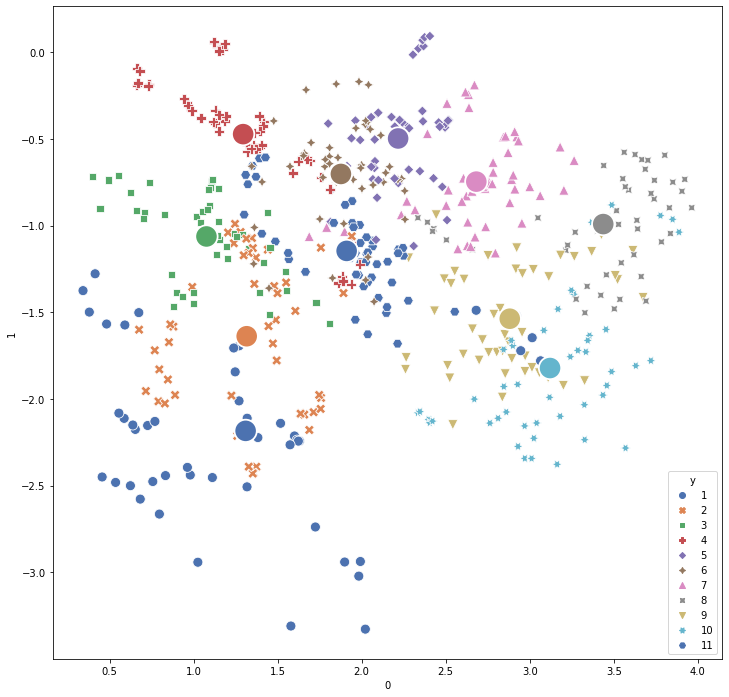

In [7]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=direcciones_discriminantes, x=0, y=1, style='y', hue='y', palette='deep', s= 100)
sns.scatterplot(data=proyected_means, x=0, y=1, s=500, hue='y', palette='deep', legend=False)

<AxesSubplot:xlabel='0', ylabel='2'>

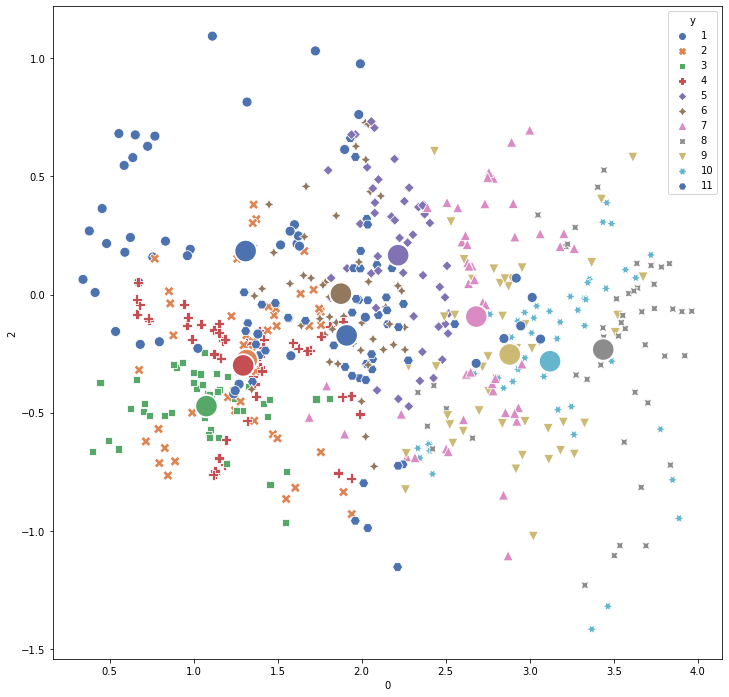

In [8]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=direcciones_discriminantes, x=0, y=2, style='y', hue='y', palette='deep', s= 100)
sns.scatterplot(data=proyected_means, x=0, y=2, s=500, hue='y', palette='deep', legend=False)

<AxesSubplot:xlabel='1', ylabel='2'>

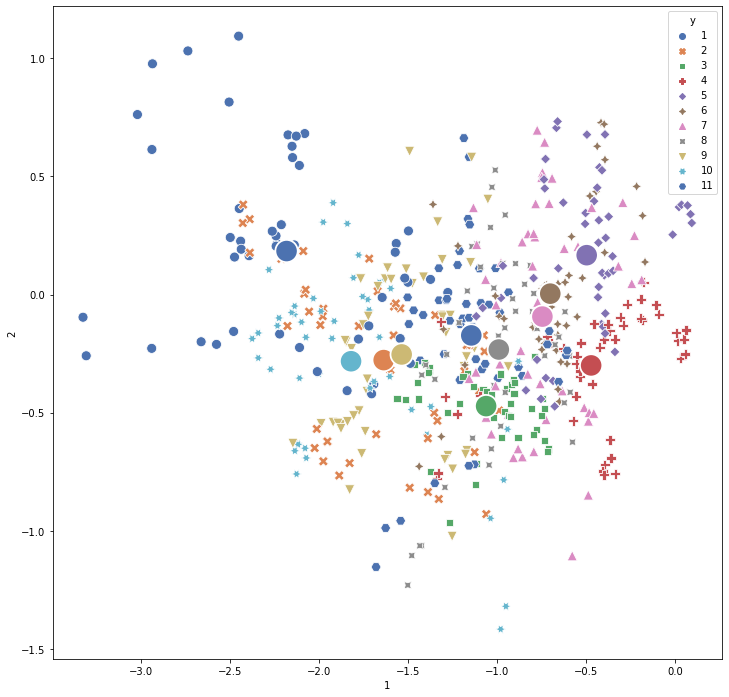

In [9]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=direcciones_discriminantes, x=1, y=2, style='y', hue='y', palette='deep', s=100)
sns.scatterplot(data=proyected_means, x=1, y=2, s=500, hue='y', palette='deep', legend=False)

<AxesSubplot:xlabel='0', ylabel='6'>

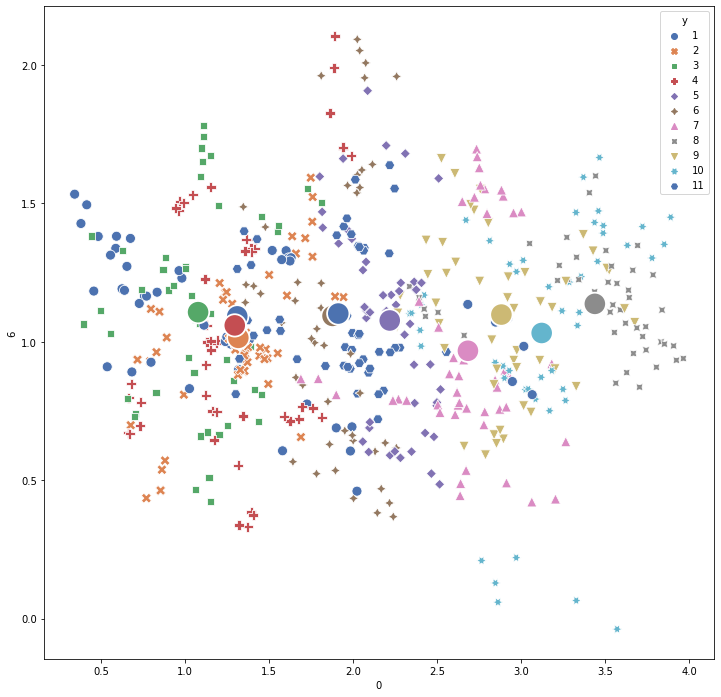

In [10]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=direcciones_discriminantes, x=0, y=6, style='y', hue='y', palette='deep', s=100)
sns.scatterplot(data=proyected_means, x=0, y=6, s=500, hue='y', palette='deep', legend=False)

<AxesSubplot:xlabel='8', ylabel='9'>

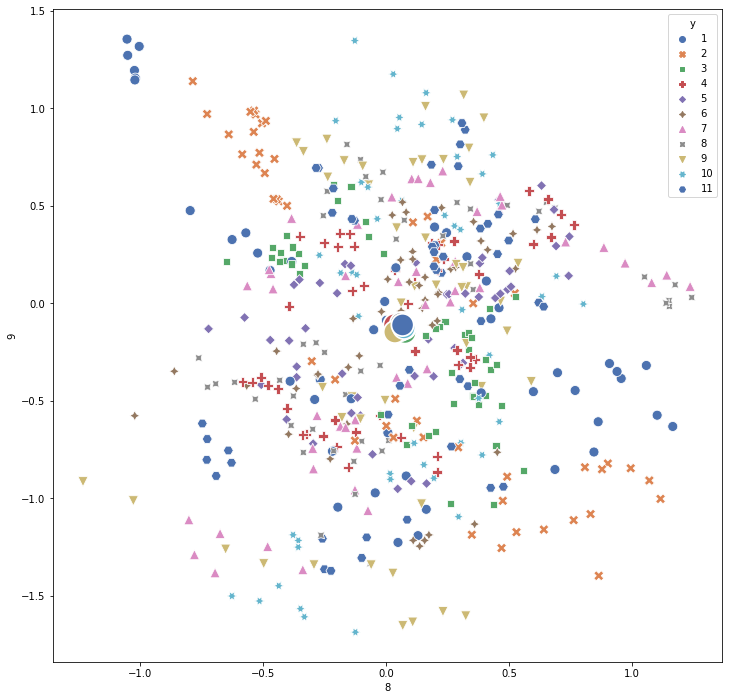

In [11]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=direcciones_discriminantes, x=8, y=9, style='y', hue='y', palette='deep', s=100)
sns.scatterplot(data=proyected_means, x=8, y=9, s=500, hue='y', palette='deep', legend=False)